In [1]:
# 1 - Import necessary libraries

import pandas as pd
import numpy as np
import os
import re
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = os.getcwd()
path

'C:\\Users\\cjang\\OneDrive\\Documents\\CollegeScorecard_Raw_Data'

In [3]:
# 2 - Retrieve the names of the 22 files and assign them to a List variable
# You would need to filter out other files
# Display the names of these 22 files

clist = os.listdir("CollegeScorecard_Raw_Data/")
clist[:] = [x for x in clist if x.startswith("MERGED")==True]
clist

['MERGED1996_97_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2018_19_PP.csv']

In [4]:
# 3 - Write code to randomly select one file name out of the 22 files names. 
# Hint: generate a random integer between 0 and 21 first
# Display the file name

file_name = random.choice(clist)
file_name

'MERGED2016_17_PP.csv'

In [5]:
# 4 - Only read the two columns: college name (INSTNM) and in state tution ("TUITIONFEE_IN")
# from this file into a data frame aand display use info() function to display a summary information

df = pd.read_csv("CollegeScorecard_Raw_Data/"+file_name, usecols=['INSTNM','TUITIONFEE_IN']) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7238 entries, 0 to 7237
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INSTNM         7238 non-null   object 
 1   TUITIONFEE_IN  4081 non-null   float64
dtypes: float64(1), object(1)
memory usage: 113.2+ KB


In [6]:
# 5 - Find out how many observations have missing value.
df.isna().sum()

INSTNM              0
TUITIONFEE_IN    3157
dtype: int64

In [7]:
# 6 - Drop those observations with missing value
# Disaply the number of observations afterward
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4081 entries, 0 to 7231
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INSTNM         4081 non-null   object 
 1   TUITIONFEE_IN  4081 non-null   float64
dtypes: float64(1), object(1)
memory usage: 95.6+ KB


In [8]:
# 7 - Find out how many observations have 0 tution. 
df.astype(bool).sum(axis=0)

INSTNM           4081
TUITIONFEE_IN    4081
dtype: int64

In [9]:
# 8 - Drop those observations with 0 tuition
# Disaply the number of observations afterward
df['TUITIONFEE_IN'] = df['TUITIONFEE_IN'].replace(0, np.nan)
df = df.dropna()
df.astype(bool).sum(axis=0)

INSTNM           4081
TUITIONFEE_IN    4081
dtype: int64

In [10]:
# 9 - Calculate and display the mean (average) of the tuitions of all the remaining observations 

t_mean = df['TUITIONFEE_IN'].mean()
print("The mean or average of the tuitions of all the remaining observations is ", df['TUITIONFEE_IN'].mean())

The mean or average of the tuitions of all the remaining observations is  14686.159029649596


In [11]:
# 10 - Randomly select just 1 observation from the data frame.
# Display the tuition of that observation. 

r_df = df.sample(n=1)
r_df

,INSTNM,TUITIONFEE_IN
2202,New Mexico Highlands University,5550.0


In [12]:
t_sr = r_df['TUITIONFEE_IN'].values[0]
r_df['TUITIONFEE_IN']

2202    5550.0
Name: TUITIONFEE_IN, dtype: float64

In [13]:
# 11 - Calculate the different between the tuition of this observation and the mean tuition off all observations calculated earlier.
# Display the difference

diff_sr = abs(t_mean - t_sr ) # difference between mean and random observation tuition_fee
diff_sr

9136.159029649596

In [14]:
# 12 - Repeat 10 to 11 several times get the feel of the size of the difference in means

for i in range(1,11): # Repeating 10 times
    r_df = df.sample()
    t = r_df['TUITIONFEE_IN'].values[0]
    print(r_df['TUITIONFEE_IN'])
    print("The different between the tuition of this observation and the mean tuition is ",abs(t_mean - t ))
    print('------------------------------------')

694    16550.0
Name: TUITIONFEE_IN, dtype: float64
The different between the tuition of this observation and the mean tuition is  1863.840970350404
------------------------------------
1753    9345.0
Name: TUITIONFEE_IN, dtype: float64
The different between the tuition of this observation and the mean tuition is  5341.159029649596
------------------------------------
2032    15780.0
Name: TUITIONFEE_IN, dtype: float64
The different between the tuition of this observation and the mean tuition is  1093.840970350404
------------------------------------
6330    15200.0
Name: TUITIONFEE_IN, dtype: float64
The different between the tuition of this observation and the mean tuition is  513.840970350404
------------------------------------
2963    20784.0
Name: TUITIONFEE_IN, dtype: float64
The different between the tuition of this observation and the mean tuition is  6097.840970350404
------------------------------------
4061    6540.0
Name: TUITIONFEE_IN, dtype: float64
The different between 

In [15]:
# 13 - Randomly select 20 observations, display the tuition of these observation. 
r_df = df.sample(n=20)
r_df['TUITIONFEE_IN']

3970     2808.0
4074     4590.0
2366    36920.0
6983     5280.0
629     16510.0
80       2600.0
1671    27684.0
6282    16117.0
2534    27790.0
7147    12975.0
731      3172.0
1304     3232.0
6083    13755.0
3378     4015.0
634      4168.0
1495     3780.0
4723     2624.0
1674     4548.0
2121     4320.0
1285     3240.0
Name: TUITIONFEE_IN, dtype: float64

In [16]:
# 14 - Calculate and display the mean tuition of these 20 observations
m = r_df['TUITIONFEE_IN'].mean()
m

10006.4

In [18]:
# 15 - Calculate  the different between the average tuition of these 20 observations and the mean tuition off all observations calculated earlier.
# Display the difference
abs(r_df['TUITIONFEE_IN']-m)

3970     7198.4
4074     5416.4
2366    26913.6
6983     4726.4
629      6503.6
80       7406.4
1671    17677.6
6282     6110.6
2534    17783.6
7147     2968.6
731      6834.4
1304     6774.4
6083     3748.6
3378     5991.4
634      5838.4
1495     6226.4
4723     7382.4
1674     5458.4
2121     5686.4
1285     6766.4
Name: TUITIONFEE_IN, dtype: float64

In [19]:
# 16 - Repeat 13 to 15 several times and get the feel of the size of the difference in means 
# Compare these differences with the differences calculated earlier with just 1 observation
# Describe your hunch/conclusion

for i in range(1,16): # Repeating 15 times
    print("OBSERVATION " + str(i) +" :")
    r_df = df.sample(n=20)
    m = r_df['TUITIONFEE_IN'].mean()
    print("mean is ",m)
    diff1 = abs(r_df['TUITIONFEE_IN']-m)
    d = {'TUITIONFEE_IN':r_df['TUITIONFEE_IN'].to_list(), 'Mean_difference_20records': diff1.to_list()}
    df_20 = pd.DataFrame(data=d)
    print(df_20)
    print('------------------------------------------------------')

OBSERVATION 1 :
mean is  17104.75
    TUITIONFEE_IN  Mean_difference_20records
0          7495.0                    9609.75
1         50912.0                   33807.25
2         11600.0                    5504.75
3         12130.0                    4974.75
4         27128.0                   10023.25
5         21850.0                    4745.25
6         20666.0                    3561.25
7          5188.0                   11916.75
8         13830.0                    3274.75
9          7835.0                    9269.75
10         3696.0                   13408.75
11         7016.0                   10088.75
12        44774.0                   27669.25
13        12075.0                    5029.75
14        16580.0                     524.75
15        43416.0                   26311.25
16        21490.0                    4385.25
17         1150.0                   15954.75
18         7146.0                    9958.75
19         6118.0                   10986.75
---------------------

### Hunch/Conclusion - By adding a sample of 20 colleges instead of just one, the average increases. Therefore when the mean difference is calculated, the difference is not as large.

> Write a function that take two input parameters:
> - x (number of observations) 
> - y (the name of the dataframe). 

> The function will perform the following: 
> - Randomly select x observations from y
> - Calculate the mean of these x observations 
> - Calculate the mean of all observations
> - Calculate the difference between the two means 
> - Return the difference

In [21]:
# 17 - write function Code here
def fun(x,y): # x is number of observations, y is the name of the dataframe
    random_df = y.sample(x) 
    mean_20 = random_df['TUITIONFEE_IN'].mean()
    mean = y['TUITIONFEE_IN'].mean()
    diff  = abs(mean - mean_20)
    return diff

In [22]:
# 18 - test the function by passing a sample size and the name of the dataframe
# Dsplay the return of the function
fun(5,df)

110.64097035040322

In [23]:
# 19 - Create a list of sequence numbers from 1 to 50, name it "sample_sizes";
# display it to make sure its members are from 1 to 50

n = []
for i in range(1,51):
    n.append(i)

print(n)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [24]:
# 20 - Create an empty list and name it "means_diff" for differences of population mean and sample means;
# Loop through the list sample_sizes:
# For each element in the sample size list, obtain a random sample of that size from the data frame;
# Calculate the sample mean 
# Calculate the difference between the population mean and the sample mean
# Append the difference to the list "means_diff"
# Display the list "means_diff" after the loop is completed

means_diff=[] # list for storing differences of population mean and sample means.
mean = df['TUITIONFEE_IN'].mean() # population mean

for i in n:
    n_df = df.sample(n=i)
    s_mean = n_df['TUITIONFEE_IN'].mean()
    means_diff.append(abs(s_mean-mean))

print(means_diff)

[4533.159029649596, 11764.840970350404, 4881.840970350404, 7343.590970350404, 399.4409703504043, 4054.159029649596, 3606.5876010781667, 4559.534029649596, 3892.49236298293, 2302.340970350404, 1175.249938740506, 1821.49236298293, 4167.302508811943, 4718.659029649596, 982.6923629829289, 933.909029649596, 1580.335500237832, 5225.2298592392945, 4894.632713860123, 2184.159029649596, 2117.031446540881, 1192.477211467778, 2367.332942693074, 2518.86736298293, 2324.6390296495956, 645.2255857350192, 1297.1219926125596, 495.6623989218333, 1233.538339994424, 1570.2256963162636, 372.61064255282145, 231.97152964959605, 1325.855999346566, 1444.4880291739337, 835.101886792454, 269.2854147948492, 524.6725431631094, 542.6327138601227, 1104.1333886239554, 3443.1909703504025, 698.4751166918668, 1426.325696316262, 253.83344825424683, 1000.5908478314141, 1581.8034740940402, 1035.123579046056, 2307.6271147559783, 1439.388196316262, 1301.3511744320367, 697.8190296495959]


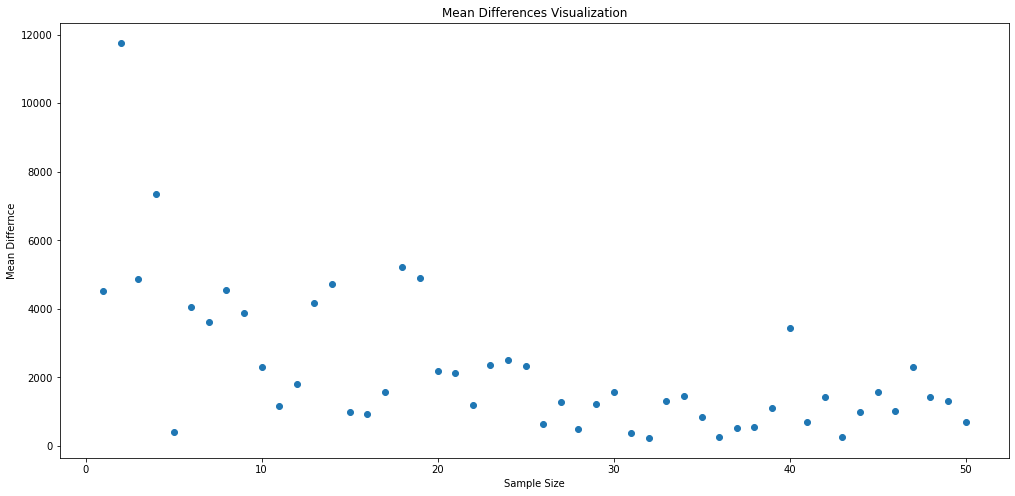

In [25]:
# 21 - Make a scatter plot with sample size on the x-axs and  mean difference on the y-axis
# Observe as the sample size increases, the sample means converge to the population mean.
# Make sure you make the plot large enough 
# d = {'Sample Size':n, 'Mean Difference': means_diff}
# s_plot_df = pd.DataFrame(data=d)

# s_plot_df.plot()

fig, ax = plt.subplots(figsize=(17,8))

# Create scatter plot
ax.scatter(n, 
           means_diff)

ax.set(title = "Mean Differences Visualization",
       xlabel = "Sample Size", 
       ylabel = "Mean Differnce")

plt.show()

In [32]:
n = []
for i in range(1,778): # sample size of 777
    n.append(i)

In [33]:
means_diff=[] # list for storing differences of population mean and sample means.
mean = df['TUITIONFEE_IN'].mean() # population mean

for i in n:
    n_df = df.sample(n=i)
    s_mean = n_df['TUITIONFEE_IN'].mean()
    means_diff.append(abs(s_mean-mean))

print(means_diff)

[2236.159029649596, 9203.159029649596, 6476.174303683736, 4339.659029649596, 825.2409703504036, 2633.174303683736, 327.84097035040395, 4257.840970350404, 342.3812518718187, 10317.640970350403, 1734.70448419505, 4225.424303683736, 6214.774414264981, 2531.516172506739, 2068.359029649597, 1564.590970350404, 26.276676708419473, 3179.3965259059587, 2044.053766491701, 243.85902964959678, 974.0161725067392, 1686.977333986768, 936.840970350404, 654.034029649596, 1689.2809703504045, 1432.120568111135, 4585.49236298293, 3388.6266846361177, 3690.021098615114, 435.40763701707147, 1840.7396748108858, 1445.278470350404, 1771.916605407172, 1448.159029649596, 987.4123989218333, 482.8812518718187, 1398.5374080279744, 3461.8169243864377, 3113.6871241965564, 1128.7090296495953, 1341.6458483991846, 369.27807726864376, 1279.9805052341253, 2201.840970350404, 435.4256963162625, 2930.210535567796, 680.2228594368298, 1462.200696316262, 326.0365806700047, 1072.180970350404, 578.1939115268742, 809.4371241965582,

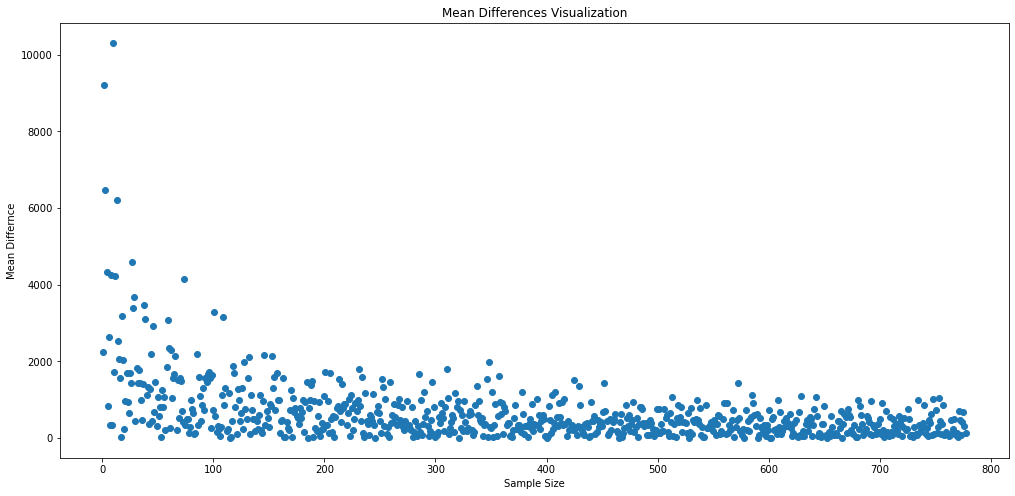

In [35]:
fig, ax = plt.subplots(figsize=(17,8))

# Create scatter plot
ax.scatter(n, 
           means_diff)

ax.set(title = "Mean Differences Visualization",
       xlabel = "Sample Size", 
       ylabel = "Mean Differnce")

plt.show()

In [36]:
# 22 - repeat 18 to 21 by replacing 50 with a larger number. For example, 300, or even 1000.
# and see how the plot looks.
n = []
for i in range(1,301): # sample size of 300
    n.append(i)

temp1=[]
temp2=[]
for j in range(1,21):
    for k in n:
        k_df = df.sample(n=k)
        s_mean = k_df['TUITIONFEE_IN'].mean()
        temp1.append(k)
        temp2.append(abs(s_mean-mean))
          
means_diff ={"sample size":temp1,"mean difference":temp2}
#df_300 is the new dataframe containing 20 observations of mean differences for a sample size of 300
df_300 = pd.DataFrame(means_diff) # Assigning sample size list as the index for convenience


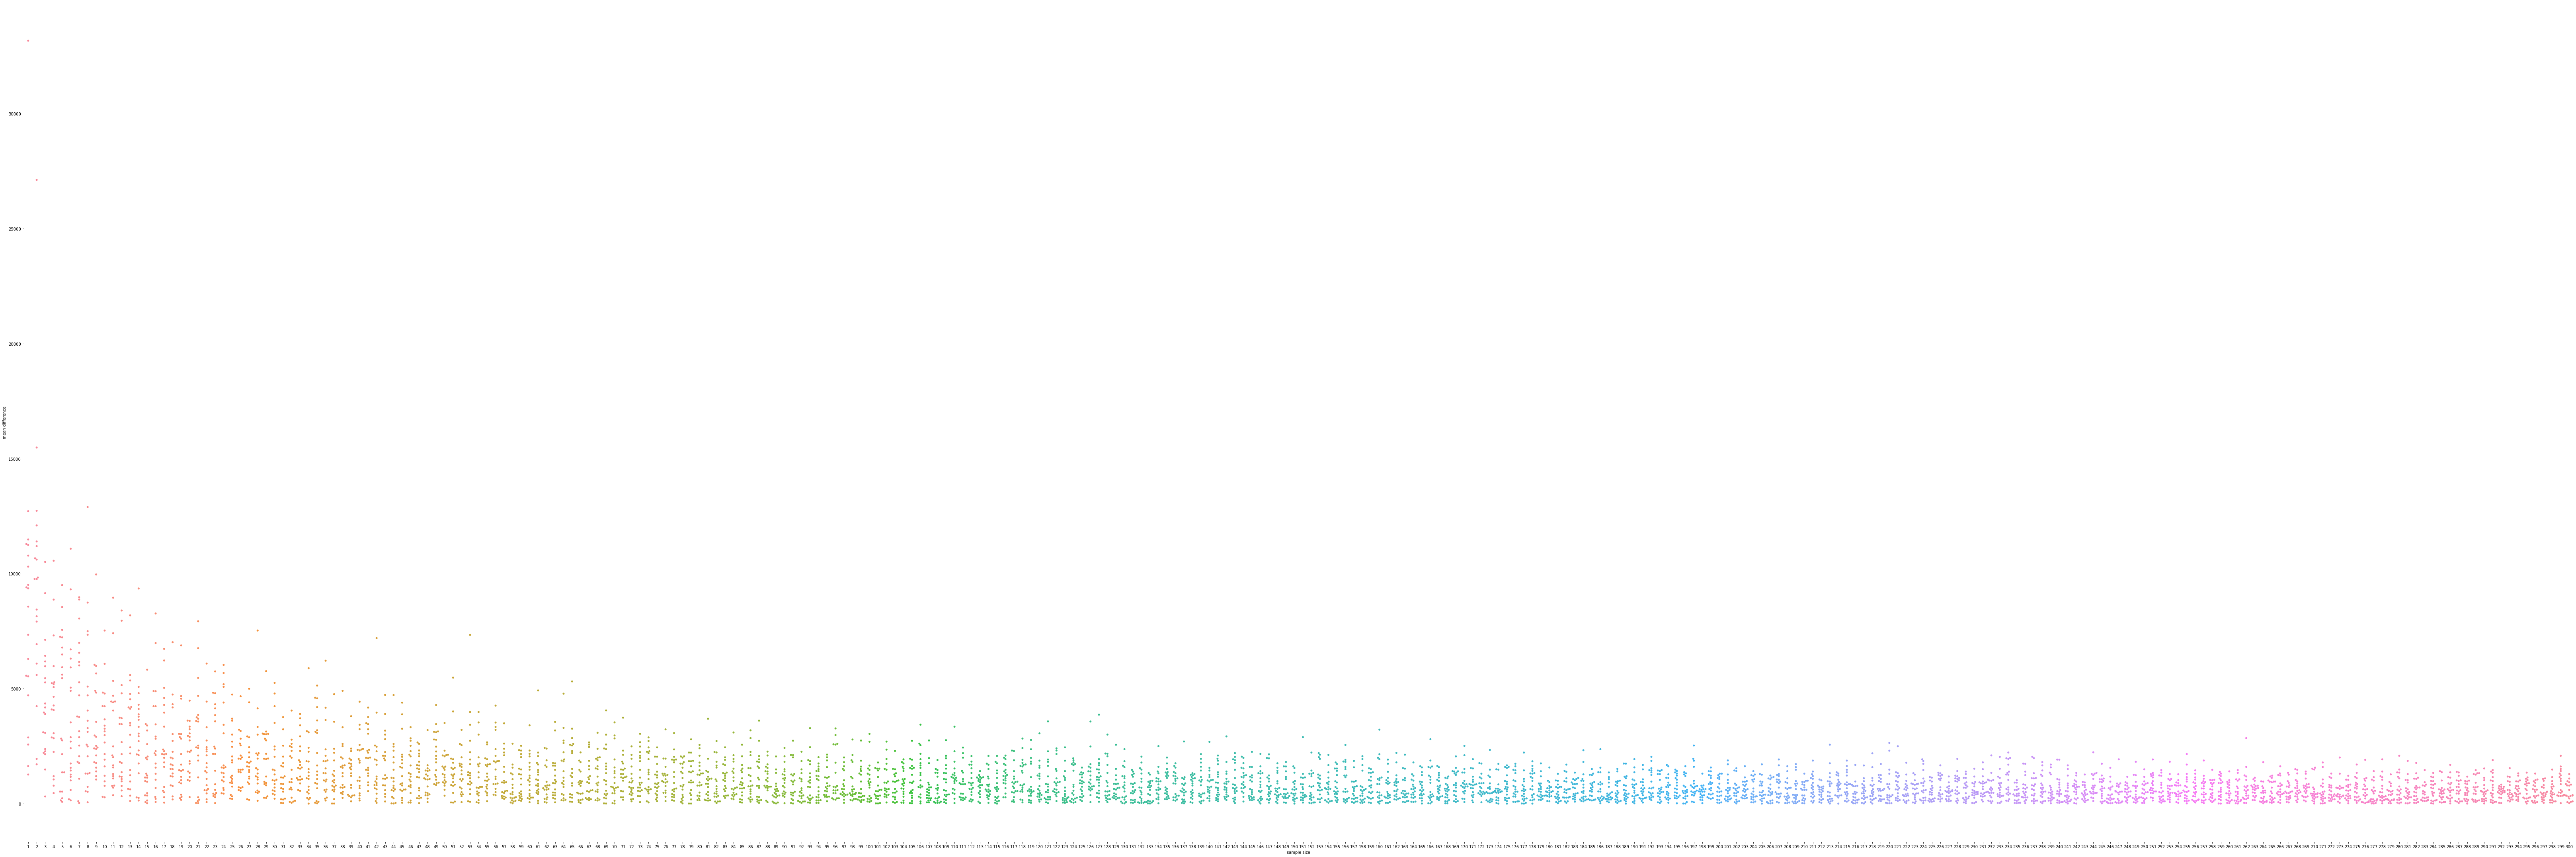

In [37]:
sns.catplot(x="sample size", y="mean difference",kind="swarm", data=df_300, height=30, aspect=3)

In [31]:
# The end - Give yourself a pat on the back!